In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Batting Statistics

In [2]:
dfbat = pd.read_csv("batsmenData.csv")
dfbat = dfbat.loc[dfbat['matches'] >= 10]
dfbat = dfbat.drop(columns = ['Unnamed: 0'])
print(dfbat.shape)
dfbat.head()

(212, 7)


,batsman,matches,hard_hitting_ability,finisher,fast_scoring_ability,consistency,running_between_wickets
0,V Kohli,141,0.155695,0.163121,1.265884,37.483051,0.653220
1,G Gambhir,146,0.157879,0.102740,1.203612,31.541985,0.639225
2,SK Raina,157,0.170971,0.146497,1.349955,33.940299,0.679083
3,RG Sharma,153,0.160965,0.156863,1.284973,32.612403,0.638383
4,S Dhawan,126,0.157072,0.134921,1.185025,32.669725,0.604899


In [3]:
Xbat = dfbat.drop(columns = ['batsman']).to_numpy()

In [4]:
# GMM - Not Advised
# AICbat = {}
# BICbat = {}
# for k in range(2,10):
#     gmbat = GaussianMixture(n_components=k, random_state=123).fit(Xbat)
#     AICbat[k] = gmbat.aic(Xbat)
#     BICbat[k] = gmbat.bic(Xbat)

# plt.plot(BICbat.keys(),BICbat.values(), label = 'BIC')
# plt.plot(AICbat.keys(),AICbat.values(), label = 'AIC')
# plt.xlabel('Number of Components(K)')
# plt.ylabel('AIC/BIC')
# plt.legend()

# gmbat6 = GaussianMixture(n_components=6).fit(Xbat)
# ybat6 = gmbat6.predict(Xbat)
# ybat6

# batdfGMM = dfbat.copy()
# batdfGMM['cluster6'] = ybat6
# batdfGMM.head()


# batdf['batsman'].loc[batdf['cluster6'] == 3]

In [5]:
# Min-Max of each attribute

# print(max(dfbat['hard_hitting_ability']),min(dfbat['hard_hitting_ability']))
# print(max(dfbat['finisher']),min(dfbat['finisher']))
# print(max(dfbat['fast_scoring_ability']),min(dfbat['fast_scoring_ability']))
# print(max(dfbat['consistency']),min(dfbat['consistency']))
# print(max(dfbat['running_between_wickets']),min(dfbat['running_between_wickets']))

## K-Means Clustering

In [6]:
# Within Cluster Sum of Squares

wcssbat = []
for i in range(1,20):
    kmbat = KMeans(n_clusters=i, random_state=0).fit(Xbat)
    wcssbat.append(kmbat.inertia_)

Text(0, 0.5, 'Distortion')

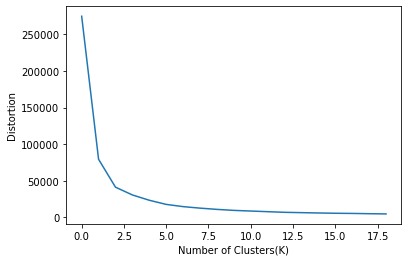

In [7]:
plt.plot(wcssbat)
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Distortion')

**Optimal number of clusters is chosen as k = 6**

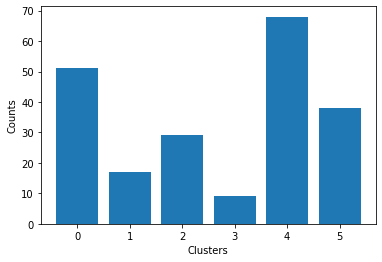

In [8]:
# 6 clusters 

kmbat6 = KMeans(n_clusters=6, random_state=0).fit(Xbat)
predbat = kmbat6.predict(Xbat)
uniquebat, countsbat = np.unique(kmbat6.labels_, return_counts=True)
#unique = ('0', '1', '2','3','4')
plt.bar(uniquebat, countsbat)
plt.xlabel('Clusters')
plt.ylabel('Counts')
plt.show()

In [9]:
batdf = dfbat.copy()
batdf['kmeans6'] = kmbat6.labels_
# batdf['GMM6'] = ybat6
batdf.head(10)

,batsman,matches,hard_hitting_ability,finisher,fast_scoring_ability,consistency,running_between_wickets,kmeans6
0,V Kohli,141,0.155695,0.163121,1.265884,37.483051,0.653220,3
1,G Gambhir,146,0.157879,0.102740,1.203612,31.541985,0.639225,3
2,SK Raina,157,0.170971,0.146497,1.349955,33.940299,0.679083,3
3,RG Sharma,153,0.160965,0.156863,1.284973,32.612403,0.638383,3
4,S Dhawan,126,0.157072,0.134921,1.185025,32.669725,0.604899,3
5,RV Uthappa,143,0.169595,0.104895,1.276351,29.515625,0.619145,3
6,DA Warner,114,0.193315,0.122807,1.383184,40.140000,0.619393,1
7,MS Dhoni,143,0.151866,0.342657,1.328358,37.872340,0.712714,3
8,AM Rahane,105,0.146042,0.133333,1.174865,33.593407,0.637714,1
9,CH Gayle,100,0.222354,0.110000,1.441943,41.022472,0.440325,1


In [10]:
batdf.loc[batdf['kmeans6'] == 3]

,batsman,matches,hard_hitting_ability,finisher,fast_scoring_ability,consistency,running_between_wickets,kmeans6
0,V Kohli,141,0.155695,0.163121,1.265884,37.483051,0.653220,3
1,G Gambhir,146,0.157879,0.102740,1.203612,31.541985,0.639225,3
2,SK Raina,157,0.170971,0.146497,1.349955,33.940299,0.679083,3
3,RG Sharma,153,0.160965,0.156863,1.284973,32.612403,0.638383,3
4,S Dhawan,126,0.157072,0.134921,1.185025,32.669725,0.604899,3
5,RV Uthappa,143,0.169595,0.104895,1.276351,29.515625,0.619145,3
7,MS Dhoni,143,0.151866,0.342657,1.328358,37.872340,0.712714,3
11,KD Karthik,134,0.151271,0.126866,1.230085,24.811966,0.666500,3
15,YK Pathan,133,0.187380,0.263158,1.407514,29.816327,0.633076,3


In [11]:
batdf.loc[batdf['batsman'] == 'AB de Villiers']

,batsman,matches,hard_hitting_ability,finisher,fast_scoring_ability,consistency,running_between_wickets,kmeans6
10,AB de Villiers,118,0.185262,0.228814,1.451291,38.307692,0.710271,1


In [12]:
batdf['kmeans6'].value_counts()

4    68
0    51
5    38
2    29
1    17
3     9
Name: kmeans6, dtype: int64

In [13]:
# batdf['batsman'].loc[batdf['kmeans6'] == 2]

**Standardize the attributes (mean = 0, sd = 1)**

In [14]:
standdf1 = batdf.copy()
standdf = standdf1.drop(columns = ['batsman'])
standdf = StandardScaler().fit_transform(standdf[['matches', 'hard_hitting_ability', 'finisher', 'fast_scoring_ability','consistency', 'running_between_wickets']])
standdf = pd.DataFrame(standdf, columns = ['matches', 'hard_hitting_ability', 'finisher', 'fast_scoring_ability','consistency', 'running_between_wickets'])
standdf['kmeans6'] = batdf['kmeans6']
standdf.head()


,matches,hard_hitting_ability,finisher,fast_scoring_ability,consistency,running_between_wickets,kmeans6
0,2.888738,0.308419,-0.485251,0.507600,1.733552,0.634660,3.0
1,3.032557,0.358345,-0.839192,0.214161,1.094504,0.493270,3.0
2,3.348960,0.657620,-0.582697,0.903759,1.352478,0.895946,3.0
3,3.233905,0.428888,-0.521934,0.597547,1.209643,0.484763,3.0
4,2.457279,0.339877,-0.650554,0.126575,1.215809,0.146483,3.0


### Cluster 0

In [15]:
clus0 = batdf.loc[batdf['kmeans6'] == 0]
print(clus0.shape)

# players
clus0['batsman'].values

(51, 8)


array(['LMP Simmons', 'ML Hayden', 'GC Smith', 'KL Rahul',
       'ST Jayasuriya', 'Q de Kock', 'RS Bopara', 'JD Ryder',
       'PC Valthaty', 'HM Amla', 'CJ Anderson', 'OA Shah', 'CA Pujara',
       'RR Pant', 'JC Buttler', 'AL Menaria', 'J Botha', 'N Rana',
       'SA Asnodkar', 'AD Russell', 'KS Williamson', 'DB Ravi Teja',
       'MV Boucher', 'JR Hopes', 'KH Pandya', 'Azhar Mahmood',
       'JEC Franklin', 'RA Tripathi', 'CH Morris', 'Y Nagar', 'DB Das',
       'CA Lynn', 'B Chipli', 'Ishan Kishan', 'LA Pomersbach',
       'DJG Sammy', 'RN ten Doeschate', 'BA Stokes', 'MJ Lumb',
       'A Ashish Reddy', 'SM Katich', 'YV Takawale', 'SW Billings',
       'AS Raut', 'SP Fleming', 'TM Head', 'R Dhawan', 'Bipul Sharma',
       'SN Khan', 'Iqbal Abdulla', 'Sandeep Sharma'], dtype=object)

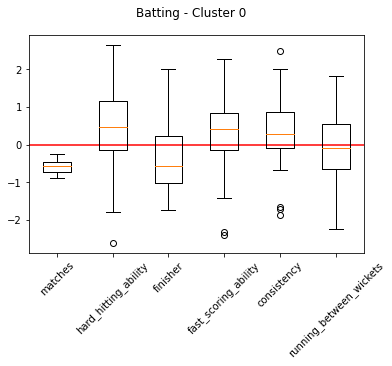

<Figure size 720x1080 with 0 Axes>

In [16]:
tempdf = standdf.loc[standdf['kmeans6'] == 0]
tempdf = tempdf.drop(columns = ['kmeans6'])
cols = list(tempdf.columns)
# clus3 = MinMaxScaler().fit_transform(clus3)
plt.boxplot(tempdf)
plt.hlines(y=0, xmin=0.5, xmax=6.5, color='r')
plt.xticks([1,2,3,4,5,6],cols, rotation = 45)
plt.suptitle('Batting - Cluster 0')
plt.figure(figsize=(10,15))
plt.show()

**Attribute wise Min-Max, mean - Cluster 0**

In [17]:
print("Overall")

print(f"Matches - Max: {max(batdf['matches'])}, Min: {min(batdf['matches'])}, Mean: {np.mean(batdf['matches'])}")
print(f"Hard Hitting - Max: {max(batdf['hard_hitting_ability'])}, Min: {min(batdf['hard_hitting_ability'])}, Mean: {np.mean(batdf['hard_hitting_ability'])}")
print(f"Finisher - Max: {max(batdf['finisher'])}, Min: {min(batdf['finisher'])}, Mean: {np.mean(batdf['finisher'])}")
print(f"Fast Scoring - Max: {max(batdf['fast_scoring_ability'])}, Min: {min(batdf['fast_scoring_ability'])}, Mean: {np.mean(batdf['fast_scoring_ability'])}")
print(f"Consistency - Max: {max(batdf['consistency'])}, Min: {min(batdf['consistency'])}, Mean: {np.mean(batdf['consistency'])}")
print(f"Running - Max: {max(batdf['running_between_wickets'])}, Min: {min(batdf['running_between_wickets'])}, Mean: {np.mean(batdf['running_between_wickets'])}")

Overall
Matches - Max: 157, Min: 10, Mean: 40.570754716981135
Hard Hitting - Max: 0.2575757575757576, Min: 0.0, Mean: 0.14220425950395357
Finisher - Max: 0.9090909090909092, Min: -0.05263157894736842, Mean: 0.24590244564168512
Fast Scoring - Max: 1.7184466019417477, Min: 0.3555555555555556, Mean: 1.1581637317938736
Consistency - Max: 44.384615384615394, Min: 1.3333333333333333, Mean: 21.366668653489164
Running - Max: 0.8557692307692307, Min: 0.19607843137254904, Mean: 0.5904000014960268


In [18]:
print("For cluster 0")

print(f"Matches - Max: {max(clus0['matches'])}, Min: {min(clus0['matches'])}, Mean: {np.mean(clus0['matches'])}")
print(f"Hard Hitting - Max: {max(clus0['hard_hitting_ability'])}, Min: {min(clus0['hard_hitting_ability'])}, Mean: {np.mean(clus0['hard_hitting_ability'])}")
print(f"Finisher - Max: {max(clus0['finisher'])}, Min: {min(clus0['finisher'])}, Mean: {np.mean(clus0['finisher'])}")
print(f"Fast Scoring - Max: {max(clus0['fast_scoring_ability'])}, Min: {min(clus0['fast_scoring_ability'])}, Mean: {np.mean(clus0['fast_scoring_ability'])}")
print(f"Consistency - Max: {max(clus0['consistency'])}, Min: {min(clus0['consistency'])}, Mean: {np.mean(clus0['consistency'])}")
print(f"Running - Max: {max(clus0['running_between_wickets'])}, Min: {min(clus0['running_between_wickets'])}, Mean: {np.mean(clus0['running_between_wickets'])}")

For cluster 0
Matches - Max: 32, Min: 10, Mean: 19.647058823529413
Hard Hitting - Max: 0.2575757575757576, Min: 0.027777777777777776, Mean: 0.16403102997180505
Finisher - Max: 0.9090909090909092, Min: -0.05263157894736842, Mean: 0.22350536974867008
Fast Scoring - Max: 1.7184466019417477, Min: 0.7222222222222222, Mean: 1.2604053721060193
Consistency - Max: 44.384615384615394, Min: 18.666666666666668, Mean: 26.77059706196587
Running - Max: 0.8557692307692307, Min: 0.4017094017094017, Mean: 0.6097167465188716


### Cluster 1

In [19]:
clus1 = batdf.loc[batdf['kmeans6'] == 1]
print(clus1.shape)

# players
clus1['batsman'].values

(17, 8)


array(['DA Warner', 'AM Rahane', 'CH Gayle', 'AB de Villiers',
       'JH Kallis', 'BB McCullum', 'M Vijay', 'PA Patel', 'Yuvraj Singh',
       'AT Rayudu', 'SR Watson', 'MK Pandey', 'V Sehwag', 'DR Smith',
       'KA Pollard', 'RA Jadeja', 'NV Ojha'], dtype=object)

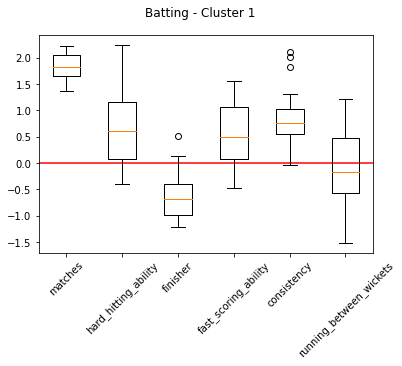

<Figure size 720x1080 with 0 Axes>

In [20]:
tempdf = standdf.loc[standdf['kmeans6'] == 1]
tempdf = tempdf.drop(columns = ['kmeans6'])
cols = list(tempdf.columns)
# clus3 = MinMaxScaler().fit_transform(clus3)
plt.boxplot(tempdf)
plt.hlines(y=0, xmin=0.5, xmax=6.5, color='r')
plt.xticks([1,2,3,4,5,6],cols, rotation = 45)
plt.suptitle('Batting - Cluster 1')
plt.figure(figsize=(10,15))
plt.show()

**Attribute wise Min-Max, mean - Cluster 1**

In [21]:
print("Overall")

print(f"Matches - Max: {max(batdf['matches'])}, Min: {min(batdf['matches'])}, Mean: {np.mean(batdf['matches'])}")
print(f"Hard Hitting - Max: {max(batdf['hard_hitting_ability'])}, Min: {min(batdf['hard_hitting_ability'])}, Mean: {np.mean(batdf['hard_hitting_ability'])}")
print(f"Finisher - Max: {max(batdf['finisher'])}, Min: {min(batdf['finisher'])}, Mean: {np.mean(batdf['finisher'])}")
print(f"Fast Scoring - Max: {max(batdf['fast_scoring_ability'])}, Min: {min(batdf['fast_scoring_ability'])}, Mean: {np.mean(batdf['fast_scoring_ability'])}")
print(f"Consistency - Max: {max(batdf['consistency'])}, Min: {min(batdf['consistency'])}, Mean: {np.mean(batdf['consistency'])}")
print(f"Running - Max: {max(batdf['running_between_wickets'])}, Min: {min(batdf['running_between_wickets'])}, Mean: {np.mean(batdf['running_between_wickets'])}")

Overall
Matches - Max: 157, Min: 10, Mean: 40.570754716981135
Hard Hitting - Max: 0.2575757575757576, Min: 0.0, Mean: 0.14220425950395357
Finisher - Max: 0.9090909090909092, Min: -0.05263157894736842, Mean: 0.24590244564168512
Fast Scoring - Max: 1.7184466019417477, Min: 0.3555555555555556, Mean: 1.1581637317938736
Consistency - Max: 44.384615384615394, Min: 1.3333333333333333, Mean: 21.366668653489164
Running - Max: 0.8557692307692307, Min: 0.19607843137254904, Mean: 0.5904000014960268


In [22]:
print("For cluster 1")

print(f"Matches - Max: {max(clus1['matches'])}, Min: {min(clus1['matches'])}, Mean: {np.mean(clus1['matches'])}")
print(f"Hard Hitting - Max: {max(clus1['hard_hitting_ability'])}, Min: {min(clus1['hard_hitting_ability'])}, Mean: {np.mean(clus1['hard_hitting_ability'])}")
print(f"Finisher - Max: {max(clus1['finisher'])}, Min: {min(clus1['finisher'])}, Mean: {np.mean(clus1['finisher'])}")
print(f"Fast Scoring - Max: {max(clus1['fast_scoring_ability'])}, Min: {min(clus1['fast_scoring_ability'])}, Mean: {np.mean(clus1['fast_scoring_ability'])}")
print(f"Consistency - Max: {max(clus1['consistency'])}, Min: {min(clus1['consistency'])}, Mean: {np.mean(clus1['consistency'])}")
print(f"Running - Max: {max(clus1['running_between_wickets'])}, Min: {min(clus1['running_between_wickets'])}, Mean: {np.mean(clus1['running_between_wickets'])}")

For cluster 1
Matches - Max: 118, Min: 88, Mean: 104.05882352941177
Hard Hitting - Max: 0.24004364429896344, Min: 0.12482853223593965, Mean: 0.17179147137576378
Finisher - Max: 0.3333333333333333, Min: 0.040404040404040414, Mean: 0.13876857362116393
Fast Scoring - Max: 1.4882705946535737, Min: 1.0593627237014405, Mean: 1.2743294160648513
Consistency - Max: 41.02247191011236, Min: 20.986486486486488, Mean: 29.398601296891925
Running - Max: 0.7102708226877874, Min: 0.4403250380904013, Mean: 0.579977014916837


### Cluster 2

In [23]:
clus2 = batdf.loc[batdf['kmeans6'] == 2]
print(clus2.shape)

# players
clus2['batsman'].values

(29, 8)


array(['SR Tendulkar', 'R Dravid', 'SE Marsh', 'MEK Hussey', 'JP Duminy',
       'AC Gilchrist', 'DPMD Jayawardene', 'MK Tiwary', 'KC Sangakkara',
       'SPD Smith', 'SC Ganguly', 'AJ Finch', 'S Badrinath', 'WP Saha',
       'SV Samson', 'BJ Hodge', 'DA Miller', 'SS Tiwary', 'DJ Hussey',
       'DJ Bravo', 'IK Pathan', 'Mandeep Singh', 'LRPL Taylor',
       'GJ Maxwell', 'JA Morkel', 'KM Jadhav', 'STR Binny',
       'Harbhajan Singh', 'PP Chawla'], dtype=object)

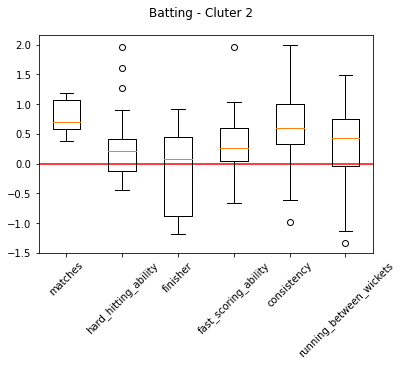

<Figure size 720x1080 with 0 Axes>

In [24]:
tempdf = standdf.loc[standdf['kmeans6'] == 2]
tempdf = tempdf.drop(columns = ['kmeans6'])
cols = list(tempdf.columns)
# clus3 = MinMaxScaler().fit_transform(clus3)
plt.boxplot(tempdf)
plt.hlines(y=0, xmin=0.5, xmax=6.5, color='r')
plt.xticks([1,2,3,4,5,6],cols, rotation = 45)
plt.suptitle('Batting - Cluter 2')
plt.figure(figsize=(10,15))
plt.show()

**Attribute wise Min-Max, mean - Cluster 2**

In [25]:
print("Overall")

print(f"Matches - Max: {max(batdf['matches'])}, Min: {min(batdf['matches'])}, Mean: {np.mean(batdf['matches'])}")
print(f"Hard Hitting - Max: {max(batdf['hard_hitting_ability'])}, Min: {min(batdf['hard_hitting_ability'])}, Mean: {np.mean(batdf['hard_hitting_ability'])}")
print(f"Finisher - Max: {max(batdf['finisher'])}, Min: {min(batdf['finisher'])}, Mean: {np.mean(batdf['finisher'])}")
print(f"Fast Scoring - Max: {max(batdf['fast_scoring_ability'])}, Min: {min(batdf['fast_scoring_ability'])}, Mean: {np.mean(batdf['fast_scoring_ability'])}")
print(f"Consistency - Max: {max(batdf['consistency'])}, Min: {min(batdf['consistency'])}, Mean: {np.mean(batdf['consistency'])}")
print(f"Running - Max: {max(batdf['running_between_wickets'])}, Min: {min(batdf['running_between_wickets'])}, Mean: {np.mean(batdf['running_between_wickets'])}")

Overall
Matches - Max: 157, Min: 10, Mean: 40.570754716981135
Hard Hitting - Max: 0.2575757575757576, Min: 0.0, Mean: 0.14220425950395357
Finisher - Max: 0.9090909090909092, Min: -0.05263157894736842, Mean: 0.24590244564168512
Fast Scoring - Max: 1.7184466019417477, Min: 0.3555555555555556, Mean: 1.1581637317938736
Consistency - Max: 44.384615384615394, Min: 1.3333333333333333, Mean: 21.366668653489164
Running - Max: 0.8557692307692307, Min: 0.19607843137254904, Mean: 0.5904000014960268


In [26]:
print("For cluster 2")

print(f"Matches - Max: {max(clus2['matches'])}, Min: {min(clus2['matches'])}, Mean: {np.mean(clus2['matches'])}")
print(f"Hard Hitting - Max: {max(clus2['hard_hitting_ability'])}, Min: {min(clus2['hard_hitting_ability'])}, Mean: {np.mean(clus2['hard_hitting_ability'])}")
print(f"Finisher - Max: {max(clus2['finisher'])}, Min: {min(clus2['finisher'])}, Mean: {np.mean(clus2['finisher'])}")
print(f"Fast Scoring - Max: {max(clus2['fast_scoring_ability'])}, Min: {min(clus2['fast_scoring_ability'])}, Mean: {np.mean(clus2['fast_scoring_ability'])}")
print(f"Consistency - Max: {max(clus2['consistency'])}, Min: {min(clus2['consistency'])}, Mean: {np.mean(clus2['consistency'])}")
print(f"Running - Max: {max(clus2['running_between_wickets'])}, Min: {min(clus2['running_between_wickets'])}, Mean: {np.mean(clus2['running_between_wickets'])}")

For cluster 2
Matches - Max: 82, Min: 54, Mean: 67.62068965517241
Hard Hitting - Max: 0.2282051282051282, Min: 0.1230110159118727, Mean: 0.15479097902371397
Finisher - Max: 0.4029850746268657, Min: 0.04411764705882353, Mean: 0.2156342396929292
Fast Scoring - Max: 1.5756410256410256, Min: 1.0173453996983408, Mean: 1.2318723744352649
Consistency - Max: 39.86, Min: 12.261904761904766, Mean: 27.49334867137482
Running - Max: 0.7379067722075637, Min: 0.4583333333333333, Mean: 0.6223307544164073


### Cluster 3

In [27]:
clus3 = batdf.loc[batdf['kmeans6'] == 3]
print(clus3.shape)

# players
clus3['batsman'].values

(9, 8)


array(['V Kohli', 'G Gambhir', 'SK Raina', 'RG Sharma', 'S Dhawan',
       'RV Uthappa', 'MS Dhoni', 'KD Karthik', 'YK Pathan'], dtype=object)

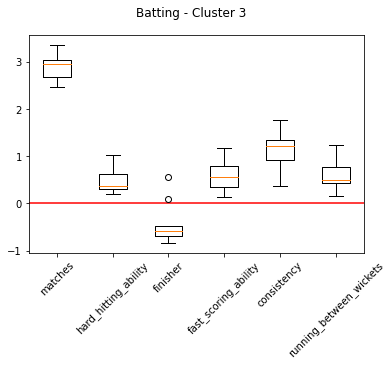

<Figure size 720x1080 with 0 Axes>

In [28]:
tempdf = standdf.loc[standdf['kmeans6'] == 3]
tempdf = tempdf.drop(columns = ['kmeans6'])
cols = list(tempdf.columns)
# clus3 = MinMaxScaler().fit_transform(clus3)
plt.boxplot(tempdf)
plt.hlines(y=0, xmin=0.5, xmax=6.5, color='r')
plt.xticks([1,2,3,4,5,6],cols, rotation = 45)
plt.suptitle('Batting - Cluster 3')
plt.figure(figsize=(10,15))
plt.show()

### Cluster 4

In [29]:
clus4 = batdf.loc[batdf['kmeans6'] == 4]
print(clus4.shape)

# players
clus4['batsman'].values

(68, 8)


array(['GH Vihari', 'UBT Chand', 'S Sohal', 'AP Tare', 'Gurkeerat Singh',
       'VVS Laxman', 'SP Goswami', 'M Kaif', 'K Goel', 'R Sathish',
       'SK Warne', 'AA Jhunjhunwala', 'MD Mishra', 'MR Marsh', 'FY Fazal',
       'R McLaren', 'MN Samuels', 'PA Reddy', 'AB Agarkar', 'CM Gautam',
       'MG Johnson', 'RE van der Merwe', 'MJ Guptill', 'N Saini',
       'DH Yagnik', 'P Dogra', 'Z Khan', 'SB Styris', 'MF Maharoof',
       'S Anirudha', 'DL Vettori', 'RJ Harris', 'JDP Oram', 'M Kartik',
       'Sachin Baby', 'MM Sharma', 'SL Malinga', 'B Lee', 'DS Kulkarni',
       'MA Starc', 'UT Yadav', 'M Morkel', 'WD Parnell', 'AD Mascarenhas',
       'RP Singh', 'R Sharma', 'MS Gony', 'WPUJC Vaas', 'S Nadeem',
       'KK Cooper', 'M Rawat', 'Ankit Sharma', 'A Nehra', 'SK Trivedi',
       'S Aravind', 'I Sharma', 'B Akhil', 'S Sreesanth',
       'NM Coulter-Nile', 'AB Dinda', 'L Balaji', 'A Kumble',
       'Mohammed Shami', 'MJ McClenaghan', 'PP Ojha', 'MM Patel',
       'HV Patel', 'PJ Sangwa

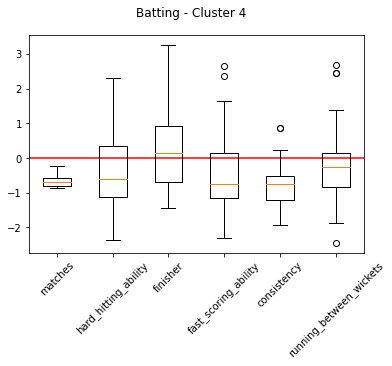

<Figure size 720x1080 with 0 Axes>

In [30]:
tempdf = standdf.loc[standdf['kmeans6'] == 4]
tempdf = tempdf.drop(columns = ['kmeans6'])
cols = list(tempdf.columns)
# clus3 = MinMaxScaler().fit_transform(clus3)
plt.boxplot(tempdf)
plt.hlines(y=0, xmin=0.5, xmax=6.5, color='r')
plt.xticks([1,2,3,4,5,6],cols, rotation = 45)
plt.suptitle('Batting - Cluster 4')
plt.figure(figsize=(10,15))
plt.show()

### Cluster 5

In [31]:
clus5 = batdf.loc[batdf['kmeans6'] == 5]
print(clus5.shape)

# players
clus5['batsman'].values

(38, 8)


array(['TM Dilshan', 'F du Plessis', 'KK Nair', 'Y Venugopal Rao',
       'HH Gibbs', 'A Symonds', 'CL White', 'MC Henriques',
       'KP Pietersen', 'M Vohra', 'MS Bisla', 'EJG Morgan', 'MA Agarwal',
       'SS Iyer', 'AD Mathews', 'AM Nayar', 'TL Suman', 'GJ Bailey',
       'AR Patel', 'M Manhas', 'SA Yadav', 'JP Faulkner',
       'Shakib Al Hasan', 'A Mishra', 'LR Shukla', 'DT Christian',
       'NLTC Perera', 'P Kumar', 'HH Pandya', 'R Bhatia', 'KV Sharma',
       'R Vinay Kumar', 'P Negi', 'DJ Hooda', 'R Ashwin', 'SP Narine',
       'DW Steyn', 'B Kumar'], dtype=object)

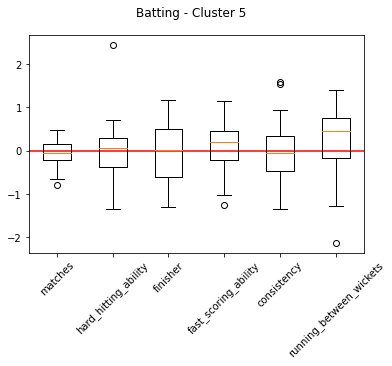

<Figure size 720x1080 with 0 Axes>

In [32]:
tempdf = standdf.loc[standdf['kmeans6'] == 5]
tempdf = tempdf.drop(columns = ['kmeans6'])
cols = list(tempdf.columns)
# clus3 = MinMaxScaler().fit_transform(clus3)
plt.boxplot(tempdf)
plt.hlines(y=0, xmin=0.5, xmax=6.5, color='r')
plt.xticks([1,2,3,4,5,6],cols, rotation = 45)
plt.suptitle('Batting - Cluster 5')
plt.figure(figsize=(10,15))
plt.show()

In [33]:
batdf.head()

,batsman,matches,hard_hitting_ability,finisher,fast_scoring_ability,consistency,running_between_wickets,kmeans6
0,V Kohli,141,0.155695,0.163121,1.265884,37.483051,0.653220,3
1,G Gambhir,146,0.157879,0.102740,1.203612,31.541985,0.639225,3
2,SK Raina,157,0.170971,0.146497,1.349955,33.940299,0.679083,3
3,RG Sharma,153,0.160965,0.156863,1.284973,32.612403,0.638383,3
4,S Dhawan,126,0.157072,0.134921,1.185025,32.669725,0.604899,3


In [34]:
points = []
for idx,row in batdf.iterrows():
    if row.kmeans6 == 0:
        points.append(7)
    if row.kmeans6 == 1:
        points.append(9)
    if row.kmeans6 == 2:
        points.append(8)
    if row.kmeans6 == 3:
        points.append(10)
    if row.kmeans6 == 4:
        points.append(5)
    if row.kmeans6 == 5:
        points.append(6)
batdf['points']= points
batdf.head(10)

,batsman,matches,hard_hitting_ability,finisher,fast_scoring_ability,consistency,running_between_wickets,kmeans6,points
0,V Kohli,141,0.155695,0.163121,1.265884,37.483051,0.653220,3,10
1,G Gambhir,146,0.157879,0.102740,1.203612,31.541985,0.639225,3,10
2,SK Raina,157,0.170971,0.146497,1.349955,33.940299,0.679083,3,10
3,RG Sharma,153,0.160965,0.156863,1.284973,32.612403,0.638383,3,10
4,S Dhawan,126,0.157072,0.134921,1.185025,32.669725,0.604899,3,10
5,RV Uthappa,143,0.169595,0.104895,1.276351,29.515625,0.619145,3,10
6,DA Warner,114,0.193315,0.122807,1.383184,40.140000,0.619393,1,9
7,MS Dhoni,143,0.151866,0.342657,1.328358,37.872340,0.712714,3,10
8,AM Rahane,105,0.146042,0.133333,1.174865,33.593407,0.637714,1,9
9,CH Gayle,100,0.222354,0.110000,1.441943,41.022472,0.440325,1,9


**Final Cluster Result**<br>

3 - Best Cluster pts 10<br>
1 - Great pts 9<br>
2 - Good pts 8<br>
0 - Okay pts 7<br>
5 - Average pts 6<br>
4 - Worst pts 5<br>

# Bowling Statistics

In [82]:
Xball = pd.read_csv("bowleratt.csv")
Xball = Xball.loc[Xball['innings'] >= 10]
Xball = Xball.drop(columns = ['Unnamed: 0', 'X','count'])
print(Xball.shape)
Xball.head()

(191, 8)


,player,innings,bm4,totalwickets,bm5,Economy,Wicket.Taking.Ability,Consistency
0,Sohail Tanvir,11,0.181818,24,2.444444,6.226415,11.041667,11.458333
1,A Zampa,11,0.090909,19,1.800000,7.493333,11.842105,14.789474
2,CRD Fernando,10,0.100000,19,2.000000,7.373494,13.105263,16.105263
3,MF Maharoof,20,0.050000,33,1.684211,7.238095,13.363636,16.121212
4,WPUJC Vaas,13,0.000000,22,1.692308,7.583333,13.090909,16.545455


In [36]:
dfball = Xball.drop(columns = ['totalwickets'])
dfballA = Xball.drop(columns = ['player','totalwickets']).to_numpy()

## K-Means Clustering

In [37]:
# Within Cluster Sum of Squares

wcssball = []
for i in range(1,20):
    kmball = KMeans(n_clusters=i, random_state=0).fit(dfballA)
    wcssball.append(kmball.inertia_)

Text(0, 0.5, 'Distortion')

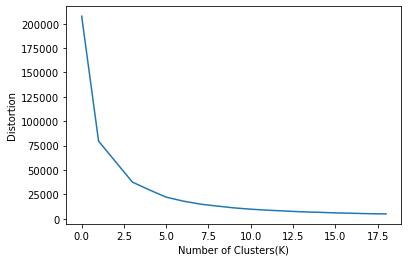

In [38]:
plt.plot(wcssball)
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Distortion')

**Optimal number of clusters is chosen as k = 6**

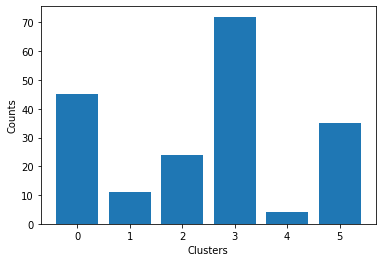

In [39]:
# 6 clusters 

kmball6 = KMeans(n_clusters=6, random_state=0).fit(dfballA)
predball = kmball6.predict(dfballA)
uniqueball, countsball = np.unique(kmball6.labels_, return_counts=True)
#unique = ('0', '1', '2','3','4')
plt.bar(uniqueball, countsball)
plt.xlabel('Clusters')
plt.ylabel('Counts')
plt.show()

In [40]:
balldf = dfball.copy()
balldf['kmeans6'] = kmball6.labels_
# batdf['GMM6'] = ybat6
balldf.head(10)

,player,innings,bm4,bm5,Economy,Wicket.Taking.Ability,Consistency,kmeans6
0,Sohail Tanvir,11,0.181818,2.444444,6.226415,11.041667,11.458333,3
1,A Zampa,11,0.090909,1.800000,7.493333,11.842105,14.789474,3
2,CRD Fernando,10,0.100000,2.000000,7.373494,13.105263,16.105263,3
3,MF Maharoof,20,0.050000,1.684211,7.238095,13.363636,16.121212,3
4,WPUJC Vaas,13,0.000000,1.692308,7.583333,13.090909,16.545455,3
5,DE Bollinger,27,0.074074,1.640000,7.160000,13.953488,16.651163,3
6,BJ Hodge,20,0.050000,0.894737,7.815126,13.222222,17.222222,3
7,SL Malinga,110,0.081818,1.594059,6.757238,15.847059,17.847059,1
8,MA Starc,26,0.076923,1.541667,7.107843,15.692308,18.589744,3
9,R Rampaul,12,0.000000,1.416667,6.884892,16.352941,18.764706,3


In [41]:
balldf['kmeans6'].value_counts()

3    72
0    45
5    35
2    24
1    11
4     4
Name: kmeans6, dtype: int64

In [42]:
balldf['player'].loc[balldf['kmeans6']==1]

7           SL Malinga
17            DJ Bravo
43            R Ashwin
45            A Mishra
57       R Vinay Kumar
59              Z Khan
73           PP Chawla
80     Harbhajan Singh
104          IK Pathan
114          RA Jadeja
144            P Kumar
Name: player, dtype: object

**Standardize the attributes (mean = 0, sd = 1)**

In [43]:
standdf1 = balldf.copy()
standdf = standdf1.drop(columns = ['player'])
standdf = StandardScaler().fit_transform(standdf[['innings', 'bm4', 'bm5','Economy', 'Wicket.Taking.Ability', 'Consistency']])
standdf = pd.DataFrame(standdf, columns = ['innings', 'bm4', 'bm5','Economy', 'Wicket.Taking.Ability', 'Consistency'])
standdf['kmeans6'] = balldf['kmeans6']
standdf['Economy'] = -1 * standdf['Economy']
standdf.head()


,innings,bm4,bm5,Economy,Wicket.Taking.Ability,Consistency,kmeans6
0,-0.858108,4.591346,4.060954,2.297763,-1.385779,-1.507160,3
1,-0.858108,1.932273,2.289124,0.539700,-1.288552,-1.230881,3
2,-0.891950,2.198181,2.839002,0.705997,-1.135118,-1.121752,3
3,-0.553526,0.735691,1.970773,0.893886,-1.103734,-1.120429,3
4,-0.790423,-0.726800,1.993036,0.414810,-1.136862,-1.085243,3


### Cluster 0

In [44]:
clus0ball = balldf.loc[balldf['kmeans6'] == 0]
print(clus0ball.shape)

# players
clus0ball['player'].values

(45, 8)


array(['Imran Tahir', 'CH Morris', 'Sandeep Sharma', 'S Aravind',
       'JD Unadkat', 'YS Chahal', 'A Kumble', 'RJ Harris',
       'Shakib Al Hasan', 'P Negi', 'MG Johnson', 'MJ McClenaghan',
       'P Awana', 'JP Faulkner', 'SK Warne', 'Iqbal Abdulla', 'KV Sharma',
       'STR Binny', 'AD Russell', 'AR Patel', 'R Sharma', 'DL Vettori',
       'HV Patel', 'JJ Bumrah', 'NLTC Perera', 'RG Sharma', 'S Sreesanth',
       'PJ Sangwan', 'SB Jakati', 'DT Christian', 'MC Henriques',
       'A Symonds', 'J Botha', 'DR Smith', 'PV Tambe', 'VR Aaron',
       'MS Gony', 'S Nadeem', 'JP Duminy', 'Mohammed Shami', 'AB Agarkar',
       'M Kartik', 'B Lee', 'AD Mathews', 'CH Gayle'], dtype=object)

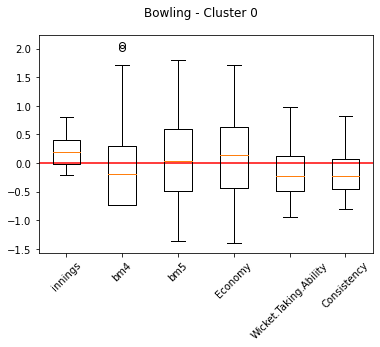

<Figure size 720x1080 with 0 Axes>

In [45]:
tempdf = standdf.loc[standdf['kmeans6'] == 0]
tempdf = tempdf.drop(columns = ['kmeans6'])
cols = list(tempdf.columns)
# clus3 = MinMaxScaler().fit_transform(clus3)
plt.boxplot(tempdf)
plt.hlines(y=0, xmin=0.5, xmax=6.5, color='r')
plt.xticks([1,2,3,4,5,6],cols, rotation = 45)
plt.suptitle('Bowling - Cluster 0')
plt.figure(figsize=(10,15))
plt.show()

### Cluster 1

In [46]:
clus1ball = balldf.loc[balldf['kmeans6'] == 1]
print(clus1ball.shape)

# players
clus1ball['player'].values

(11, 8)


array(['SL Malinga', 'DJ Bravo', 'R Ashwin', 'A Mishra', 'R Vinay Kumar',
       'Z Khan', 'PP Chawla', 'Harbhajan Singh', 'IK Pathan', 'RA Jadeja',
       'P Kumar'], dtype=object)

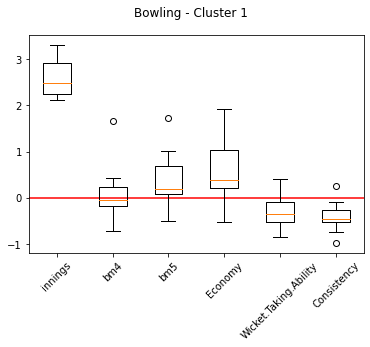

<Figure size 720x1080 with 0 Axes>

In [47]:
tempdf = standdf.loc[standdf['kmeans6'] == 1]
tempdf = tempdf.drop(columns = ['kmeans6'])
cols = list(tempdf.columns)
# clus3 = MinMaxScaler().fit_transform(clus3)
plt.boxplot(tempdf)
plt.hlines(y=0, xmin=0.5, xmax=6.5, color='r')
plt.xticks([1,2,3,4,5,6],cols, rotation = 45)
plt.suptitle('Bowling - Cluster 1')
plt.figure(figsize=(10,15))
plt.show()

### Cluster 2

In [48]:
clus1ball = balldf.loc[balldf['kmeans6'] == 2]
print(clus1ball.shape)

# players
clus1ball['player'].values

(24, 8)


array(['SP Narine', 'B Kumar', 'A Nehra', 'MM Patel', 'MM Sharma',
       'DS Kulkarni', 'DW Steyn', 'RP Singh', 'PP Ojha', 'M Morkel',
       'L Balaji', 'SR Watson', 'JA Morkel', 'R Bhatia', 'AB Dinda',
       'UT Yadav', 'M Muralitharan', 'SK Trivedi', 'KA Pollard',
       'Yuvraj Singh', 'YK Pathan', 'JH Kallis', 'SK Raina', 'I Sharma'],
      dtype=object)

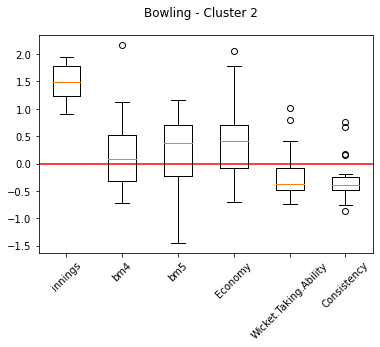

<Figure size 720x1080 with 0 Axes>

In [49]:
tempdf = standdf.loc[standdf['kmeans6'] == 2]
tempdf = tempdf.drop(columns = ['kmeans6'])
cols = list(tempdf.columns)
# clus3 = MinMaxScaler().fit_transform(clus3)
plt.boxplot(tempdf)
plt.hlines(y=0, xmin=0.5, xmax=6.5, color='r')
plt.xticks([1,2,3,4,5,6],cols, rotation = 45)
plt.suptitle('Bowling - Cluster 2')
plt.figure(figsize=(10,15))
plt.show()

### Cluster 3

In [50]:
clus1ball = balldf.loc[balldf['kmeans6'] == 3]
print(clus1ball.shape)

# players
clus1ball['player'].values

(72, 8)


array(['Sohail Tanvir', 'A Zampa', 'CRD Fernando', 'MF Maharoof',
       'WPUJC Vaas', 'DE Bollinger', 'BJ Hodge', 'MA Starc', 'R Rampaul',
       'AB McDonald', 'NM Coulter-Nile', 'AD Mascarenhas', 'CJ Jordan',
       'Rashid Khan', 'RE van der Merwe', 'A Singh', 'YA Abdulla',
       'MR Marsh', 'Washington Sundar', 'A Ashish Reddy', 'DP Nannes',
       'BW Hilfenhaus', 'CR Woakes', 'KK Cooper', 'A Chandila',
       'KW Richardson', 'Azhar Mahmood', 'RS Bopara', 'VY Mahesh',
       'BA Stokes', 'GB Hogg', 'Kuldeep Yadav', 'WD Parnell',
       'SM Pollock', 'Harmeet Singh', 'J Theron', 'D Wiese',
       'KP Pietersen', 'Mustafizur Rahman', 'ST Jayasuriya',
       'JEC Franklin', 'DJG Sammy', 'SN Thakur', 'SW Tait',
       'CR Brathwaite', 'AC Thomas', 'GD McGrath', 'Shahid Afridi',
       'Bipul Sharma', 'KP Appanna', 'S Kaul', 'AG Murtaza', 'LR Shukla',
       'PJ Cummins', 'JDP Oram', 'TL Suman', 'MN Samuels', 'Basil Thampi',
       'JD Ryder', 'MP Stoinis', 'J Syed Mohammad', 'PC Va

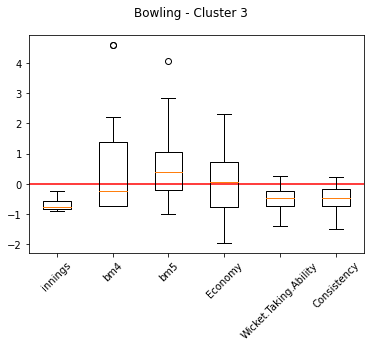

<Figure size 720x1080 with 0 Axes>

In [51]:
tempdf = standdf.loc[standdf['kmeans6'] == 3]
tempdf = tempdf.drop(columns = ['kmeans6'])
cols = list(tempdf.columns)
# clus3 = MinMaxScaler().fit_transform(clus3)
plt.boxplot(tempdf)
plt.hlines(y=0, xmin=0.5, xmax=6.5, color='r')
plt.xticks([1,2,3,4,5,6],cols, rotation = 45)
plt.suptitle('Bowling - Cluster 3')
plt.figure(figsize=(10,15))
plt.show()

### Cluster 4

In [52]:
clus1ball = balldf.loc[balldf['kmeans6'] == 4]
print(clus1ball.shape)

# players
clus1ball['player'].values

(4, 8)


array(['Parvez Rasool', 'TM Dilshan', 'V Kohli', 'AA Jhunjhunwala'],
      dtype=object)

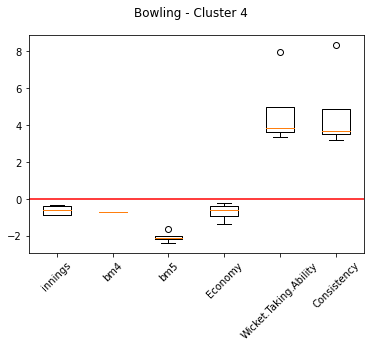

<Figure size 720x1080 with 0 Axes>

In [53]:
tempdf = standdf.loc[standdf['kmeans6'] == 4]
tempdf = tempdf.drop(columns = ['kmeans6'])
cols = list(tempdf.columns)
# clus3 = MinMaxScaler().fit_transform(clus3)
plt.boxplot(tempdf)
plt.hlines(y=0, xmin=0.5, xmax=6.5, color='r')
plt.xticks([1,2,3,4,5,6],cols, rotation = 45)
plt.suptitle('Bowling - Cluster 4')
plt.figure(figsize=(10,15))
plt.show()

### Cluster 5

In [54]:
clus1ball = balldf.loc[balldf['kmeans6'] == 5]
print(clus1ball.shape)

# players
clus1ball['player'].values

(35, 8)


array(['KH Pandya', 'RN ten Doeschate', 'IC Pandey', 'R Dhawan',
       'BAW Mendis', 'VRV Singh', 'AN Ahmed', 'BB Sran', 'M Ashwin',
       'B Akhil', 'RR Powar', 'AM Nayar', 'Ankit Sharma', 'J Suchith',
       'TG Southee', 'R Sathish', 'JO Holder', 'V Sehwag', 'KC Cariappa',
       'R McLaren', 'JR Hopes', 'GJ Maxwell', 'AA Chavan', 'Pankaj Singh',
       'VS Malik', 'DJ Hooda', 'CJ Anderson', 'AL Menaria',
       'Y Venugopal Rao', 'DJ Hussey', 'J Yadav', 'S Kaushik', 'S Tyagi',
       'HH Pandya', 'A Mithun'], dtype=object)

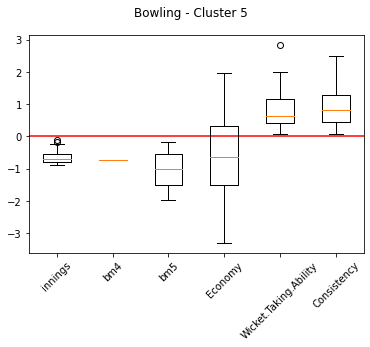

<Figure size 720x1080 with 0 Axes>

In [55]:
tempdf = standdf.loc[standdf['kmeans6'] == 5]
tempdf = tempdf.drop(columns = ['kmeans6'])
cols = list(tempdf.columns)
# clus3 = MinMaxScaler().fit_transform(clus3)
plt.boxplot(tempdf)
plt.hlines(y=0, xmin=0.5, xmax=6.5, color='r')
plt.xticks([1,2,3,4,5,6],cols, rotation = 45)
plt.suptitle('Bowling - Cluster 5')
plt.figure(figsize=(10,15))
plt.show()

**Final Cluster Result**<br>

1 - Best Cluster 10<br>
2 - Great 9<br>
0 - Good 8<br>
3 - Okay 7<br>
4 - Average 6<br>
5 - Worst 5<br>

In [56]:
points = []
for idx,row in balldf.iterrows():
    if row.kmeans6 == 0:
        points.append(8)
    if row.kmeans6 == 1:
        points.append(10)
    if row.kmeans6 == 2:
        points.append(9)
    if row.kmeans6 == 3:
        points.append(7)
    if row.kmeans6 == 4:
        points.append(6)
    if row.kmeans6 == 5:
        points.append(5)
balldf['points']= points
balldf.head(10)

,player,innings,bm4,bm5,Economy,Wicket.Taking.Ability,Consistency,kmeans6,points
0,Sohail Tanvir,11,0.181818,2.444444,6.226415,11.041667,11.458333,3,7
1,A Zampa,11,0.090909,1.800000,7.493333,11.842105,14.789474,3,7
2,CRD Fernando,10,0.100000,2.000000,7.373494,13.105263,16.105263,3,7
3,MF Maharoof,20,0.050000,1.684211,7.238095,13.363636,16.121212,3,7
4,WPUJC Vaas,13,0.000000,1.692308,7.583333,13.090909,16.545455,3,7
5,DE Bollinger,27,0.074074,1.640000,7.160000,13.953488,16.651163,3,7
6,BJ Hodge,20,0.050000,0.894737,7.815126,13.222222,17.222222,3,7
7,SL Malinga,110,0.081818,1.594059,6.757238,15.847059,17.847059,1,10
8,MA Starc,26,0.076923,1.541667,7.107843,15.692308,18.589744,3,7
9,R Rampaul,12,0.000000,1.416667,6.884892,16.352941,18.764706,3,7


# Result

In [57]:
squad2018 = pd.read_csv('squad.csv')
squad2018 = squad2018.drop(columns = ['Unnamed: 0'])
squad2018

,Chennai Super Kings,Delhi Daredevils,Kings XI Punjab,Kolkata Knight Riders,Mumbai Indians,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad
0,AT Rayudu,A Mishra,AD Nath,AD Russell,A Dananjaya,AM Rahane,AB de Villiers,A Hales
1,D Shorey,Ankit Sharma,AJ Finch,CA Lynn,AS Yadav,Ankit Sharma,BB McCullum,B Kumar
2,D Willey,Avesh Khan,AJ Tye,J Searles,BCJ Cutting,Anureet Singh,C de Grandhomme,B Stanlake
3,DJ Bravo,C Munro,AR Patel,KD Karthik,E Lewis,B Laughlin,CJ Anderson,Basil Thampi
4,DL Chahar,CH Morris,AS Rajpoot,Kuldeep Yadav,HH Pandya,BA Stokes,CR Woakes,CJ Jordan
5,F du Plessis,DT Christian,BB Sran,MG Johnson,Ishan Kishan,D Short,K Khejroliya,CR Brathwaite
6,Harbhajan Singh,G Gambhir,CH Gayle,N Rana,JJ Bumrah,DS Kulkarni,M Ali,DJ Hooda
7,Imran Tahir,GJ Maxwell,DA Miller,P Krishna,JP Duminy,H Klaasen,M Ashwin,K Ahmed
8,KM Asif,HV Patel,KK Nair,PP Chawla,KA Pollard,I Sodhi,M Vohra,KS Williamson
9,KM Jadhav,J Dala,KL Rahul,R Singh,KH Pandya,J Archer,Mandeep Singh,MK Pandey


In [58]:
teamcol = []
players = []
for col in list(squad2018.columns):
    teamcol.append([col] * len(squad2018[col]))
    players.append(list(squad2018[col].values))

In [59]:
players

[['AT Rayudu',
  'D Shorey',
  'D Willey',
  'DJ Bravo',
  'DL Chahar',
  'F du Plessis',
  'Harbhajan Singh',
  'Imran Tahir',
  'KM Asif',
  'KM Jadhav',
  'KV Sharma',
  'L Ngidi',
  'M Vijay',
  'M Wood',
  'MS Dhoni',
  'RA Jadeja',
  'SK Raina',
  'SN Thakur',
  'SR Watson',
  'SW Billings',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['A Mishra',
  'Ankit Sharma',
  'Avesh Khan',
  'C Munro',
  'CH Morris',
  'DT Christian',
  'G Gambhir',
  'GJ Maxwell',
  'HV Patel',
  'J Dala',
  'JJ Roy',
  'L Plunkett',
  'Mohammed Shami',
  'NV Ojha',
  'P Shaw',
  'R Tewatia',
  'RR Pant',
  'S Lamichhane',
  'S Nadeem',
  'SS Iyer',
  'TA Boult',
  'V Shankar',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['AD Nath',
  'AJ Finch',
  'AJ Tye',
  'AR Patel',
  'AS Rajpoot',
  'BB Sran',
  'CH Gayle',
  'DA Miller',
  'KK Nair',
  'KL Rahul',
  'M Ur Rahman',
  'MA Agarwal',
  'MK 

In [60]:
players_flat = [item for sublist in players for item in sublist]
players_flat

['AT Rayudu',
 'D Shorey',
 'D Willey',
 'DJ Bravo',
 'DL Chahar',
 'F du Plessis',
 'Harbhajan Singh',
 'Imran Tahir',
 'KM Asif',
 'KM Jadhav',
 'KV Sharma',
 'L Ngidi',
 'M Vijay',
 'M Wood',
 'MS Dhoni',
 'RA Jadeja',
 'SK Raina',
 'SN Thakur',
 'SR Watson',
 'SW Billings',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'A Mishra',
 'Ankit Sharma',
 'Avesh Khan',
 'C Munro',
 'CH Morris',
 'DT Christian',
 'G Gambhir',
 'GJ Maxwell',
 'HV Patel',
 'J Dala',
 'JJ Roy',
 'L Plunkett',
 'Mohammed Shami',
 'NV Ojha',
 'P Shaw',
 'R Tewatia',
 'RR Pant',
 'S Lamichhane',
 'S Nadeem',
 'SS Iyer',
 'TA Boult',
 'V Shankar',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'AD Nath',
 'AJ Finch',
 'AJ Tye',
 'AR Patel',
 'AS Rajpoot',
 'BB Sran',
 'CH Gayle',
 'DA Miller',
 'KK Nair',
 'KL Rahul',
 'M Ur Rahman',
 'MA Agarwal',
 'MK Tiwary',
 'MM Sharma',
 'MP Stoinis',
 'R Ashwin',
 'Yuvraj Singh',
 '0',
 '0',
 '0',

In [61]:
teamcol_flat = [item for sublist in teamcol for item in sublist]
teamcol_flat

['Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Delhi Daredevils',
 'Delhi Daredevils',
 'Delhi Daredevils',
 'Delhi Daredevils',
 'Delhi Daredevils',
 'Delhi Daredevils',
 'Delhi Daredevils',
 'Delhi Dared

In [62]:
pointsData = pd.DataFrame(columns = ['team', 'player', 'batting_score', 'bowling_score', 'overall'])
pointsData['team'] = teamcol_flat
pointsData['player'] = players_flat
pointsData['batting_score'] = 0
pointsData['bowling_score'] = 0
pointsData['overall'] = 0
# len(teamcol_flat), len(players_flat)

In [63]:
pointsData = pointsData.loc[(pointsData[['player']] != str(0)).all(axis=1)]

In [64]:
for idx, row in pointsData.iterrows():
    if row['player'] in (batdf['batsman']).values:
        pointsData.at[idx,'batting_score'] = int(batdf['points'].loc[batdf['batsman'] == row['player']].values)

In [65]:
for idx, row in pointsData.iterrows():
    if row['player'] in (balldf['player']).values:
        pointsData.at[idx,'bowling_score'] = int(balldf['points'].loc[balldf['player'] == row['player']].values)

In [66]:
pointsData

,team,player,batting_score,bowling_score,overall
0,Chennai Super Kings,AT Rayudu,9,0,0
1,Chennai Super Kings,D Shorey,0,0,0
2,Chennai Super Kings,D Willey,0,0,0
3,Chennai Super Kings,DJ Bravo,8,10,0
4,Chennai Super Kings,DL Chahar,0,0,0
...,...,...,...,...,...
260,Sunrisers Hyderabad,Sandeep Sharma,7,8,0
261,Sunrisers Hyderabad,Shakib Al Hasan,6,8,0
262,Sunrisers Hyderabad,SP Goswami,5,0,0
263,Sunrisers Hyderabad,WP Saha,8,0,0


In [80]:
pointsData.loc[pointsData['team'] == 'Chennai Super Kings']

,team,player,batting_score,bowling_score,overall
0,Chennai Super Kings,AT Rayudu,9,5,7.0
1,Chennai Super Kings,D Shorey,5,5,5.0
2,Chennai Super Kings,D Willey,5,5,5.0
3,Chennai Super Kings,DJ Bravo,8,10,9.0
4,Chennai Super Kings,DL Chahar,5,5,5.0
5,Chennai Super Kings,F du Plessis,6,5,5.5
6,Chennai Super Kings,Harbhajan Singh,8,10,9.0
7,Chennai Super Kings,Imran Tahir,5,8,6.5
8,Chennai Super Kings,KM Asif,5,5,5.0
9,Chennai Super Kings,KM Jadhav,8,5,6.5


In [68]:
pointsData['batting_score'] = pointsData['batting_score'].replace(0,5).values
pointsData['bowling_score'] = pointsData['bowling_score'].replace(0,5).values

In [69]:
pointsData['overall'] = (pointsData['batting_score'] + pointsData['bowling_score'])/2

In [70]:
pointsData

,team,player,batting_score,bowling_score,overall
0,Chennai Super Kings,AT Rayudu,9,5,7.0
1,Chennai Super Kings,D Shorey,5,5,5.0
2,Chennai Super Kings,D Willey,5,5,5.0
3,Chennai Super Kings,DJ Bravo,8,10,9.0
4,Chennai Super Kings,DL Chahar,5,5,5.0
...,...,...,...,...,...
260,Sunrisers Hyderabad,Sandeep Sharma,7,8,7.5
261,Sunrisers Hyderabad,Shakib Al Hasan,6,8,7.0
262,Sunrisers Hyderabad,SP Goswami,5,5,5.0
263,Sunrisers Hyderabad,WP Saha,8,5,6.5


In [71]:
# pointsData.loc[pointsData['team'] == 'Sunrisers Hyderabad']
# pointsData.loc[pointsData['overall'] >=8.0]
# pointsData.loc[pointsData['player'] == 'David Warner']

In [72]:
teams = list(pointsData['team'].unique())

In [73]:
pointsData['overall'].loc[pointsData['team'] == teams[0]].sum()

135.0

In [74]:
tot_score = {}
for team in teams:
    den = len(pointsData['player'].loc[pointsData['team'] == team])
    tot_score[team] = pointsData['overall'].loc[pointsData['team'] == team].sum()/den

In [75]:
dict(sorted(tot_score.items(), key = lambda x: x[1], reverse = True))

{'Chennai Super Kings': 6.75,
 'Kings XI Punjab': 6.352941176470588,
 'Kolkata Knight Riders': 6.34375,
 'Mumbai Indians': 6.266666666666667,
 'Sunrisers Hyderabad': 6.2,
 'Royal Challengers Bangalore': 6.075,
 'Delhi Daredevils': 5.931818181818182,
 'Rajasthan Royals': 5.7894736842105265}